In [142]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
import metpy.calc as mp
from metpy.units import units
from windrose import WindroseAxes
import matplotlib.cm as cm

def pmelTransport(files):
    bigDs = []
    fig = plt.figure(figsize=(18,8))
    for file in files:
        ds = xr.open_dataset(file,decode_times=False)
        times = ds.time.values+ds.time2.values/1000/60/60/24
        t2 = [Time(time,format='jd').iso for time in times]
        ds['time3'] = pd.to_datetime(t2)
        ds = ds.where(ds.v_1206<1000)
        #plt.plot(ds.time3,np.cumsum(np.ravel(ds.sel(depth=20).v_1206)))
        #plt.ylim(-10000,100000)
        bigDs.append(ds)
    return bigDs

def readTracks(file):
    dfTracks = pd.read_csv(file)
    dfTracks['Date_S'] = dfTracks['Date_S'].astype(str)
    dfTracks['Datetime'] = pd.to_datetime(dfTracks['Date_S'] + ' ' + dfTracks['Time_S'])
    dfTracks = dfTracks.drop(['Date_S','Time_S'], axis=1)
    dfTracks = dfTracks.set_index('Datetime')
    return dfTracks

def plotADCP(bigDS):
    d = []
    speed = []
    for i in range(len(bigDS)):
        curADCP = bigDs[i].sel(depth=24)#,time3=slice("2018-07-01", "2019-09-30"))
        d.append(np.ravel(mp.wind_direction(np.ravel(curADCP.u_1205)*units('cm/s'),np.ravel(curADCP.v_1206)*units('cm/s'),convention='to')))
        speed.append(np.ravel(mp.wind_speed(np.ravel(curADCP.u_1205)*units('cm/s'),np.ravel(curADCP.v_1206)*units('cm/s'))))
    ax = WindroseAxes.from_ax()
    #ax.bar(np.concatenate(d).magnitude, np.concatenate(speed).magnitude,  bins=np.arange(0, 5, 100), cmap=cm.Greys_r)
    ax.bar(np.concatenate(d).magnitude, np.concatenate(speed).magnitude, normed=True,bins=np.arange(0, 41, 1), cmap=cm.plasma)
    ax.set_yticks([0,5,10,15,20,25])
    ax.set_yticklabels(['0','5','10','15','20','25'],fontsize=14)
    ax.set_rlabel_position(110)
    ax.set_theta_zero_location("N")  # theta=0 at the top
    ax.set_theta_direction(-1)  # theta increasing clockwise
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
        
def plotTracks(dfCur):
    ax = WindroseAxes.from_ax()
    ax.bar(dfCur.directHead, dfCur.directSpeed*100, normed=True,bins=np.arange(0, 41, 1), cmap=cm.plasma)
    #ax.set_legend()
    ax.set_yticks([0,5,10,15,20,25])
    ax.set_yticklabels(['0','5','10','15','20','25'],fontsize=14)
    ax.set_rlabel_position(110)
    ax.set_theta_zero_location("N")  # theta=0 at the top
    ax.set_theta_direction(-1)  # theta increasing clockwise
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
        
D1_4 = ['../data/physicalData/PMEL_2017_17ckp11a_wcp_vel.nc','../data/physicalData/PMEL_2018_18ckp11a_wcp_vel.nc']
D2_5 = ['../data/physicalData/PMEL_2017_17ckp1a_wcp_vel.nc','../data/physicalData/PMEL_2018_18ckp1a_wcp_vel.nc']
D6 = ['../data/physicalData/PMEL_2018_18ckp4a_wcp_vel.nc']

df1 = readTracks('../data/analysisFiles/TrackRegions1.csv')
df4 = readTracks('../data/analysisFiles/TrackRegions4.csv')
dfC11 = pd.concat([df1,df4])

df2 = readTracks('../data/analysisFiles/TrackRegions2.csv')
df5 = readTracks('../data/analysisFiles/TrackRegions5.csv')
dfC1 = pd.concat([df2,df5])

dfC4 = readTracks('../data/analysisFiles/TrackRegions6.csv')

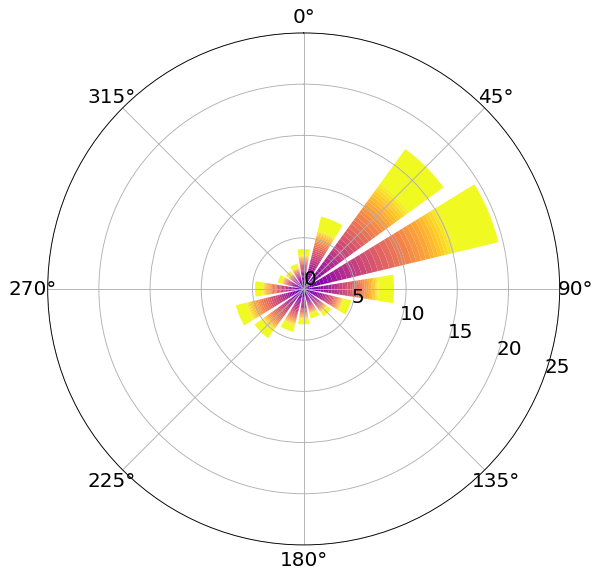

<Figure size 1296x576 with 0 Axes>

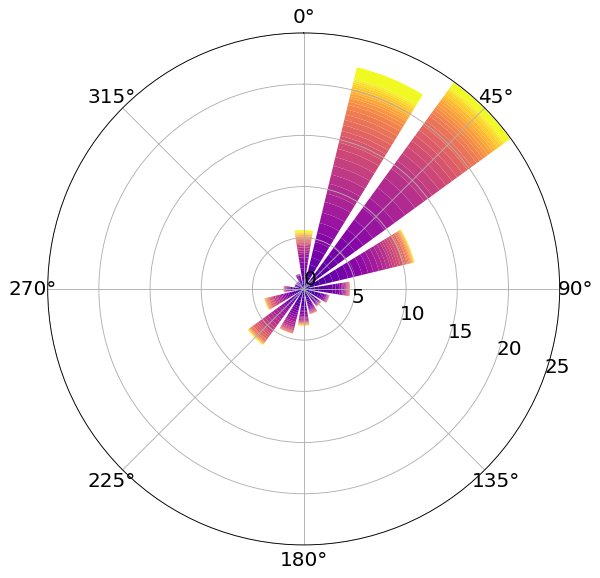

In [114]:
plotTracks(dfC11)
bigDs = pmelTransport(D1_4)
plotADCP(bigDs)

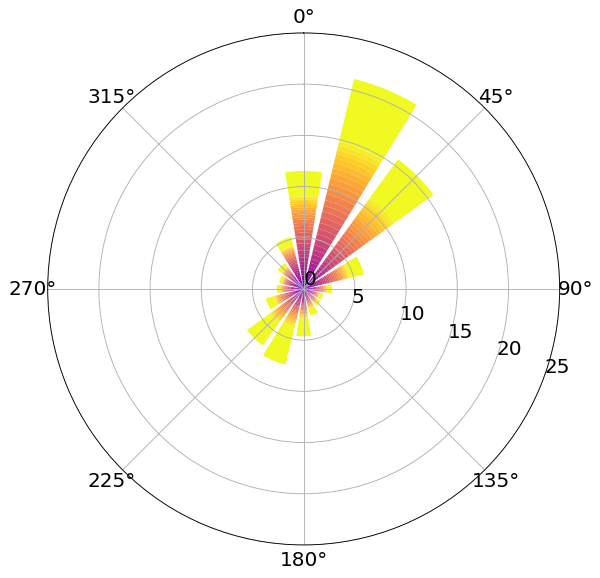

<Figure size 1296x576 with 0 Axes>

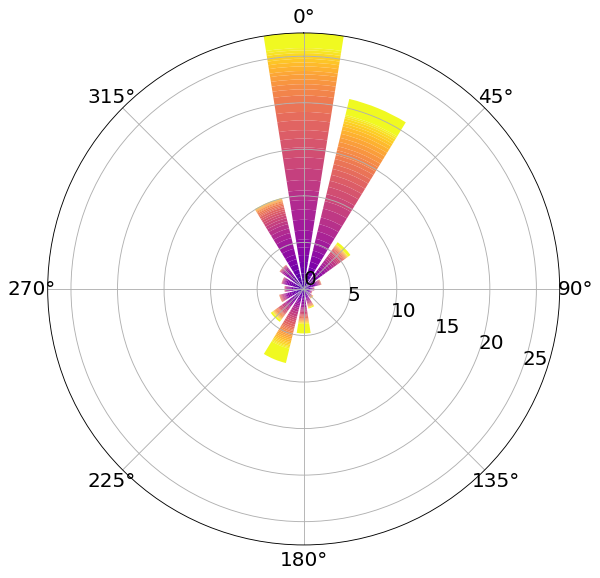

In [113]:
plotTracks(dfC1)
bigDs = pmelTransport(D2_5)
plotADCP(bigDs)

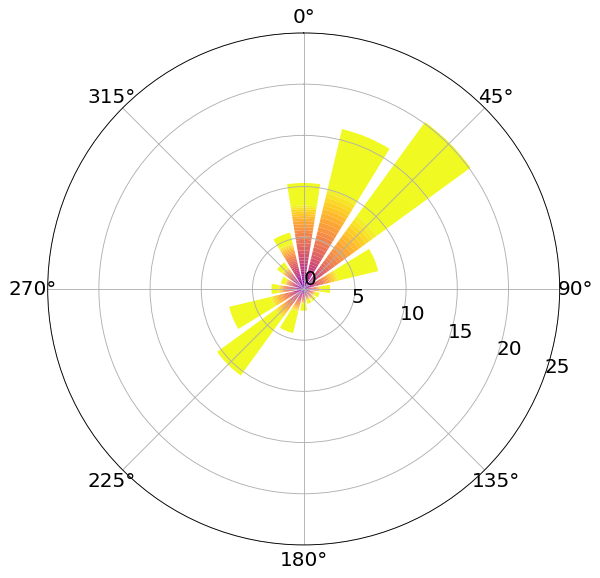

<Figure size 1296x576 with 0 Axes>

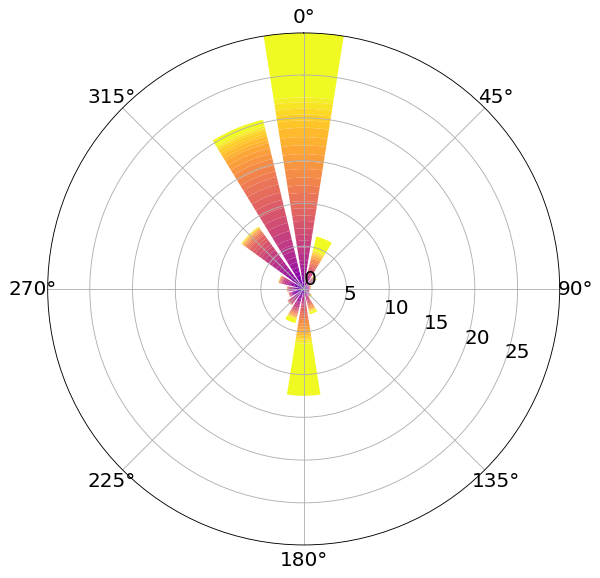

In [182]:
plotTracks(dfC4)
bigDs = pmelTransport(D6)
plotADCP(bigDs)